# Einblick in die Immersed Boundary Methode

In [1]:
# wie immer, lass uns einige wichtige Module importieren
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as lin           

---

### Aufgabe 11.1

Die voll-entwickelte, laminare Strömung in einem Rohr beliebiges aber entlang der Rohachse konstanten Querschnitts ist von der folgenden zweidimensionalen Laplace-Gleichung beschrieben:

\begin{equation}
    \nu(u_{/yy} + u_{/zz}) = \Pi_x \, ,   \qquad \qquad (1)
\end{equation}

wobei $\Pi_x$ einen räumlich und zeitlich konstanten Druckgradienten ist, während $u$ die Geschwindigkeitskomponente entlang der Rohrachse ($x$-Richtung) und $\nu$ die kinematische Viskosität ist. Wir betrachten eine Luftströmung ($\nu=1.5 \cdot 10^{-5}\,\,\mathrm{m^2/s}$, $\rho=1 \,\,\mathrm{Kg/m^3}$), welche von einem Druckgradienten von $\Pi_x = 10^{-2}\,\,\mathrm{Pa/m}$ getrieben wird. 

Nachdem Sie die Gleichung (1) mit zentralen finiten Differenzen zweiter Ordnung à $N_x=N_y=N_r$ Punkten in den jeweiligen Raumrichtungen diskretisiert haben, überführen Sie numerisch die diskretisierte Gleichung in ein lineares, algebraisches Gleichungssystem der Form $\mathsf{A}\mathbf{u} = \mathbf{b}$ für das vorliegende Rohr mit kreisförmigen Querschnitt (siehe Übungsblatt). Zur Vorgabe der Haftbedingung verwenden Sie zunächst die Stufen-Approximation: Für Punkte, die sich im inneren des Rohres befinden, wird die diskretisierte Form der Gleichung (1) wie gewohnt gelöst. Für Punkte, die sich auf der Körperkontur oder hinter Dieser (also außerhalb des Rohres) befinden, wird die Haftbedingung $u=0$ vorgegeben. Setzen Sie den Ursprung des cartesischen Koordinatensystem in die Rohrmitte: diese Wahl wird Ihnen im Folgenden helfen. Kapseln Sie die ganze Lösung in eine Funktion ``solve_simple`` ein, welche aus den Eingabeparameter $N_r$, $P_x$, $\nu$, $\rho$ und $D$ die Vektoren $\mathbf{y}$ und $\mathbf{z}$ der Koordinaten und den Lösungsvektor $\mathbf{u}$ ausgibt. Für die Rechenaufgaben können Sie das zur Verfügung gestelltes Jupyter-Notebook ``ImmersedBoundary_Vorlage.ipynb`` als Vorlage verwenden.

In [2]:
# zuerst definieren wir einige
# EINGABEN
# -----------------------------
Nr = 10           # Anzahl von Punkten in beiden Raumrichtungen
Px = -1e-3        # Druckgradienten in x-Richtung     [Pa/m]
nu = 1.5e-5       # kinematische Viskosität           [m^2/s]
rho = 1           # Dichte                            [kg/m^3]
D  = 2            # Durchmesser                       [m]

In [3]:
# Wir sind schon bereit für die Definition vom
# EINFACHEN LÖSER
def solve_simple(Nr,Px,nu,rho,D):
    # BERECHNETE GRÖßEN
    # -----------------------------
    Nz = Nr                                  # Anzahl von Punkten in z-Richtung
    Ny = Nr                                  # Anzahl von Punkten in y-Richtung
    R = 0.5*D                                  # Radius
    z = np.linspace(-R,R,Nz)                                  # Vektor der z-Koordinate und z-Gitterweite
    dz = z[1]-z[0]
    y = np.linspace(-R,R,Ny)                                  # Vektor der y-Koordinate und y-Gitterweite
    dy = y[1]-y[0]

    NN = Nz*Ny                                # Gesmte Größe der Systemmatrix
    A = np.zeros([NN,NN])                              # Systemmatrix A
    b = np.zeros([NN])                              # Vektor der rechten Seite b
                                    
    # Koeffizienten für die Matrix A
    phi_z = dy**2/(2*(dz**2+dy**2))
    phi_y = dz**2/(2*(dz**2+dy**2))
    phi_0 = dz**2 * dy**2/(2*(dz**2+dy**2))
    
    # Dieses Mal definiere ich die Matrix A 
    # durch eine for-Schleife 
    for iz in range(z.size):
        for iy in range(y.size):
            # Ich berechne die richtige Zeile und Spalte,
            # wo die Koeffezienten für die werte phi(i,j)
            # phi(i+1,j), phi(i-1,j), phi(i,j-1), phi(i,j+1)
            # sich befinden
            P = iz*Ny+iy
            N = iz*Ny+(iy+1)
            S = iz*Ny+(iy-1)
            E = (iz+1)*Ny+iy
            W = (iz-1)*Ny+iy
            
            # Ich berechne den Abstand zur Rohrmitte "r",
            # um zu entscheiden, ob ich in oder aus 
            # dem Rohr bin
            r = np.sqrt(z[iz]**2+y[iy]**2)

            # Wenn wir am Rand oder drüber sind, dann Haftbedingung
            if r>=R:
                A[P,P] = 1
                b[P]   = 0

            # ansonsten lösen wir wie gewohnt
            else:
                A[P,P] = 1
                A[P,N] = -phi_y
                A[P,S] = -phi_y
                A[P,E] = -phi_z
                A[P,W] = -phi_z
                b[P]   = -Px*phi_0/nu
        
    # Wir lösen das lineare Gleichungssystem
    u = lin.solve(A,b)

    # und geben Koordinaten und Lösung aus
    # ich verwende ".reshape", um die Lösung
    # als 2D Matix auszzgeben
    return y,z,u.reshape(Ny,Nz)


# Wir führen unseren Löser mit Nr=10 aus
y,z,u = solve_simple(Nr,Px,nu,rho,D)

Jetzt können wir endlich die Lösung graphisch darstellen!

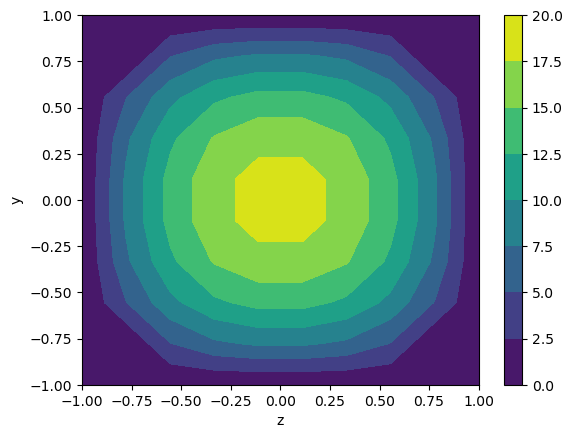

In [4]:
# Wir öfnnen eine Abbildung
plt.figure()
# mit der Funktion plt.contourf stellen wir 
# das Ergebnis dar. 
plt.contourf(z,y,u,vmin=0,vmax=20)
# Wir zeigen die Colorbar
plt.colorbar()
# und beschriften die Achsen
plt.xlabel('z')
plt.ylabel('y')
plt.show()

Schreiben Sie eine Funktion Namens ``cf_re``, welche den Reibungsbeiwert $C_f$ und die Reynoldszahl $Re_b$ basierend auf Ihrer Lösung $\mathbf{u}$, den Koordinatenvektoren $\mathbf{y}$, $\mathbf{z}$ sowie den Eingabeparametern $P_x$, $\nu$, $\rho$ und $D$ berechnet. Die jeweilige Definitionen sind:
    \begin{equation}
        C_f = \frac{2 \tau_w}{\rho U_b^2}\, ,   \qquad  Re=\frac{U_b D}{\nu} \, ,
    \end{equation}
    wobei $\tau_w$ die Wandschubspannung und $U_b$ die mittlere Geschwindigkeit ist. Sie können $U_b$ aus der folgenden Definition
    \begin{equation}
         U_b = \frac{1}{\pi R^2}\int_{-R}^{R} \int_{-R}^{R} u(y,z) \mathrm{d}y \mathrm{d}z 
    \end{equation}
    durch die Anwendung der Trapezregel numerisch berechnen. Zur Berechnung von $\tau_w$ leiten Sie eine analytische Beziehung zwischen $\tau_w$ und $\Pi_x$ her, in dem Sie die Kräftebilanz für eine Scheibe vom Rohr der Länge $\mathrm{d}x$ aufstellen. Benutzen Sie Ihre Funktion um $C_f$ und $Re_b$ sowie ihr Produkt $C_f \, Re_b$ für den vorliegenden Fall zu berechnen. Wie vergleicht sich das Produkt $C_f \, Re_b$ mit dem analytischen Ergebnis für eine Hagen--Poiseulle Strömung $C_f \, Re_b = 16$ ?

In [5]:
# wir können jetzt die Funktion 
# cf_re definieren
def cf_re(y,z,u,Px,nu,rho,D):
    R = 0.5*D                           # Radius [m]
    uB = np.trapz(np.trapz(u,x=z),x=y)/(np.pi*R**2)                           # Bulk Velocity durch Integration
    ReB = uB*D/nu                           # "Bulk" Reynolds-Zahl
    tauw = -Px*R/2                           # Wandschubspannung
    Cf = 2*tauw/(rho*uB**2)                           # Reibungsbeiwert
    # Wir geben Cf und ReB aus
    return Cf, ReB

Cf, ReB = cf_re(y,z,u,Px,nu,rho,D)
print(Cf*ReB)

12.736372447591554


Als Vorbereitung zur Implementierung eines neuen Lösers mit der verbesserten Beschreibung von der Körperkontur, schreiben Sie die Funktion ``isInBody``, welche aus den zwei Raumkoordinaten $y$ und $z$ sowie dem Radius $R$ eine Schaltvariable (True / False) ausgibt, welche Wahr (True) ist, wenn der betrachtete Punkt auf oder in dem Körper ist. 

In [6]:
# isInBody-Funktion
def isInBody(y,z,R):
    # diese Funktion ist einfach ein Einzeiler :)
    r = np.sqrt(y**2+z**2)
    return r>=R

Als weitere Vorbereitung implementieren Sie die Funktion ``bisection``, welche den Schnittpunkt zwischen der Körperkontur und dem betrachteten Ast des Differenzensterns berechnet, um $\delta_y$ (oder $\delta_z$) zu liefern.

In [7]:
# die Funktion "bisection"
def bisection(fun,delta):
    # Ich definiere die Funktion 
    # als eine Bisektion, welche 
    # eine boolean'sche Funktion
    # als Eingabe nimmt
    tol = 1e-5               # Toleranz
    err = 1e5               # Fehler (groß initialisiert)

    xT = delta
    xF = 0

    # Wir berechnen den Mittelpunkt
    xm = (xT+xF)/2
 
    # Wir iterieren solange der Fehler
    # größer als die Toleranz ist
    while err>tol:
        # Bisektion
        if fun(xm):
            xT = xm
        else:
            xF = xm
        # Anpassung des Fehlers
        err = np.abs(xT-xF)
        # Wir berechnen den Mittelpunkt
        xm= (xT+xF)/2
    # Wir geben das Ergebnis aus
    return xm
 

Kopieren Sie Ihre Funktion ``solve_simple`` und benennen Sie die Kopie zu ``solve_IBM`` um. Ändern Sie Ihren Löser, so dass er die verbesserte Randbedingung aus Aufgabenteil 11.2a) berücksichtigt. Hierfür müssen Sie die gewohnte Dirichlet Randbedingung für Punkte auf oder in dem Körper und die gewohnte Koeffizienten der diskreten Laplace-Gleichung für alle andere Punkte vorgeben. Für alle Punkte in dem Strömungsgebiet, deren Nachbarn auf oder in dem Körper liegen, müssen Sie die Koeffizienten der Matrix $\mathsf{A}$ entsprechend Ihrer Herleitung aus Aufgabenteil 11.2a) anpassen. Verwenden Sie für diesen Aufgabeteil Ihre Funktionen ``isInBody`` und ``bisection``.

In [8]:
# Wir sind schon bereit für die Definition vom
# VERBESSERTEN LÖSER
def solve_ibm(Nr,Px,nu,rho,D):
       # BERECHNETE GRÖßEN
    # -----------------------------
    Nz = Nr                                  # Anzahl von Punkten in z-Richtung
    Ny = Nr                                  # Anzahl von Punkten in y-Richtung
    R = 0.5*D                                  # Radius
    z = np.linspace(-R,R,Nz)                                  # Vektor der z-Koordinate und z-Gitterweite
    dz = z[1]-z[0]
    y = np.linspace(-R,R,Ny)                                  # Vektor der y-Koordinate und y-Gitterweite
    dy = y[1]-y[0]

    NN = Nz*Ny                                # Gesmte Größe der Systemmatrix
    A = np.zeros([NN,NN])                              # Systemmatrix A
    b = np.zeros([NN])                              # Vektor der rechten Seite b
                                    
    # Koeffizienten für die Matrix A
    phi_z = dy**2/(2*(dz**2+dy**2))
    phi_y = dz**2/(2*(dz**2+dy**2))
    phi_0 = dz**2 * dy**2/(2*(dz**2+dy**2))
    
    # Dieses Mal definiere ich die Matrix A 
    # durch eine for-Schleife 
    for iz in range(z.size):
        for iy in range(y.size):
            # Ich berechne die richtige Zeile und Spalte,
            # wo die Koeffezienten für die werte phi(i,j)
            # phi(i+1,j), phi(i-1,j), phi(i,j-1), phi(i,j+1)
            # sich befinden
            P = iz*Ny+iy
            N = iz*Ny+(iy+1)
            S = iz*Ny+(iy-1)
            E = (iz+1)*Ny+iy
            W = (iz-1)*Ny+iy

            # Wenn wir am Rand sind, dann Haftbedingung
            if isInBody(y[iy],z[iz],R):
                A[P,P] = 1
                b[P] = 0
            
            # Ansonsten 
            else: 
                # zuerst setzen wir die Koeffizienten wie normal
                A[P,P] = 1
                A[P,N] = -phi_y
                A[P,S] = -phi_y
                A[P,E] = -phi_z
                A[P,W] = -phi_z
                b[P]   = -Px*phi_0/nu

                # und überprüfen dann ob der Punkt doch in der Nähe
                # des Randes ist. Das machen wir dann in allen Richtungen
                if isInBody(y[iy+1],z[iz],R):                   # oben
                    # Anpassung der Koeffizienten
                    fun = lambda x: isInBody(y[iy]+x,z[iz],R)
                    deltay = bisection(fun,dy)
                    A[P,P] += A[P,N]*(1-dy/deltay)
                    A[P,N] = 0
                    
                if isInBody(y[iy-1],z[iz],R):                   # unten
                    # Anpassung der Koeffizienten
                    fun = lambda x: isInBody(y[iy]-x,z[iz],R)
                    deltay = bisection(fun,dy)
                    A[P,P] += A[P,S]*(1-dy/deltay)
                    A[P,S] = 0

                if isInBody(y[iy],z[iz+1],R):                   # rechts
                    # Anpassung der Koeffizienten
                    fun = lambda x: isInBody(y[iy],z[iz]+x,R)
                    deltaz = bisection(fun,dz)
                    A[P,P] += A[P,E]*(1-dz/deltaz)
                    A[P,E] = 0
                    
                if isInBody(y[iy],z[iz-1],R):                   # links
                    # Anpassung der Koeffizienten
                    fun = lambda x: isInBody(y[iy],z[iz]-x,R)
                    deltaz = bisection(fun,dz)
                    A[P,P] += A[P,W]*(1-dz/deltaz)
                    A[P,W] = 0

                    
    # Lösung des Gleichungssystems
    u = lin.solve(A,b)
    
    # und geben Koordinaten und Lösung aus
    # ich verwende ".reshape", um die Lösung
    # als 2D Matix auszzgeben
    return y,z,u.reshape(Ny,Nz)

# Wir führen unseren Löser mit Nr=10 aus
y,z,uIBM = solve_ibm(Nr,Px,nu,rho,D)

Jetzt können wir das Ergebnis darstellen und mit dem vereinfachten Löser vergleichen

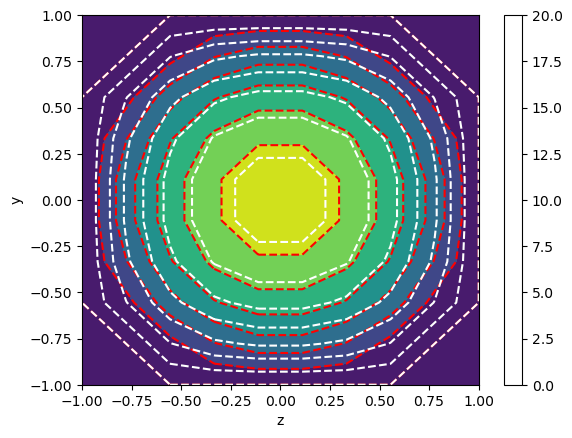

In [9]:
# Wir öfnnen eine Abbildung
plt.figure()
# mit der Funktion plt.contourf stellen wir 
# das Ergebnis dar. 
clevels = np.array([0,2.5,5,7.5,10,12.5,15,17.5,20])
plt.contourf(z,y,uIBM)
plt.contour(z,y,uIBM,clevels,colors='r',linestyles='dashed')
plt.contour(z,y,u,clevels,colors='w',linestyles='dashed')
# Wir zeigen die Colorbar
plt.colorbar()
# und beschriften die Achsen
plt.xlabel('z')
plt.ylabel('y')
plt.show()


Vergleichen Sie das Produkt $C_f\, Re_b$ mit der einfacheren Methode aus Aufgabe 11.1. Welche ist näher an der exakten Lösung? Variieren Sie $N_r$ zwischen 5 und 100 und vergleichen Sie die Konvergenz der zwei Methoden zum exakten Ergebnis. Verwenden Sie den prozentualen Fehler vom Produkt $C_f\, Re_b$ als Gütegröße. 

In [10]:
# berechnung von Cf und Re für den IBM-Fall
Cf_IBM,ReB_IBM = cf_re(y,z,uIBM,Px,nu,rho,D)
# berechnung von Cf und Re für den einfachen Fall
Cf,ReB = cf_re(y,z,u,Px,nu,rho,D)


# Ausgabe der Produkte Cf*Re am Bildschirm
print('The product Cf*ReB is '+str(Cf_IBM*ReB_IBM)+' for the IBM case')
print('The product Cf*ReB is '+str(Cf*ReB)+' for the simple case')

The product Cf*ReB is 15.854575194327978 for the IBM case
The product Cf*ReB is 12.736372447591554 for the simple case


Konvergenzstudie

In [13]:
# Array der Nr-Werte
Nr_array = np.array([5,10,15,20,25,30,40,50,75,100])

# Wir verwenden Listen für die Speicherung der 
# Cf*Re-Produkte für den IBM und einfachen Fall
Cf_ReB = list()
Cf_ReB_IBM = list()

# Schleife über alle Nr-Werte
for Nr in Nr_array:
    # Berechnung der einfachen Lösung
    y,z,u = solve_simple(Nr,Px,nu,rho,D)
    # Berechnung von Cf und Re
    Cf,ReB = cf_re(y,z,u,Px,nu,rho,D)
    # Speicherung in der Liste
    Cf_ReB.append(Cf*ReB)
    
    # Berechnung der IBM Lösung
    y,z,u = solve_ibm(Nr,Px,nu,rho,D)
    # Berechnung von Cf und Re
    Cf_IBM,ReB_IBM = cf_re(y,z,u,Px,nu,rho,D)
    # Speicherung in der Liste
    Cf_ReB_IBM.append(Cf_IBM*ReB_IBM)


Wir stellen das Ergebnis der Konvergenzstudie dar. 

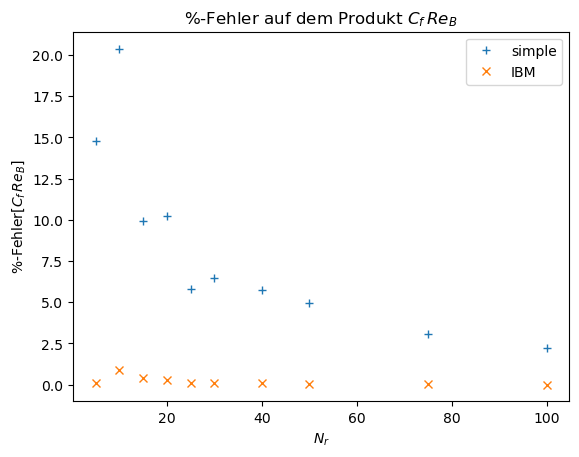

In [14]:
# Wir öffnen eine neue Abbildung
plt.figure()
# Wir geben der Abbildung einen Titel
plt.title(r'%-Fehler auf dem Produkt $C_f\, Re_B $')
# Wir stellen das Ergebnis für den einfachen Fall dar 
plt.plot(Nr_array,(16-np.array(Cf_ReB))/16*100,'+',label='simple')
# Wir stellen das Ergebnis für den IBM Fall dar 
plt.plot(Nr_array,(16-np.array(Cf_ReB_IBM))/16*100,'x',label='IBM')
# Wir beschriften die Achsen
#plt.xlog()
plt.xlabel(r'$N_r$')
plt.ylabel(r'%-Fehler[$C_f\, Re_B$]')
# ... und zeigen die Legende
plt.legend()
plt.show()
